In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
connection = sqlite3.connect("accident_data_v1.0.0_2023.db")#establishes a connection to an SQLite database named "accident_data_v1.0.0_2023.db.

In [3]:
cur = connection.cursor()# To execute SQL queries

### Joining the four tables namely accident,vehicle,casualty and Lsoa tables and storing it in a dataframe

In [4]:
request3 = """
SELECT * FROM accident
JOIN vehicle ON accident.accident_index = vehicle.accident_index
JOIN casualty ON accident.accident_index = casualty.accident_index
JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
WHERE accident.accident_year =2020
"""
result_df = pd.read_sql_query(request3, connection)
result_df #result_df contains all the joined four tables

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,casualty_type,casualty_home_area_type,casualty_imd_decile,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,0,1,4,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,0,1,2,3034,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,0,1,2,3034,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,1,3,4726,E01004726,Westminster 003C,Westminster 003C,1.857269e+05,2698.692831,e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,0,1,3,3617,E01003617,Newham 012B,Newham 012B,2.326906e+05,3013.438191,3e1979c9-8863-4982-afa5-7a6de00635d7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,9,3,7,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201939,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,9,3,7,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201940,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,9,3,7,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201941,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,9,3,7,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef


In [5]:
result_df.info()#This method provides a concise summary of the DataFrame's data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201943 entries, 0 to 201942
Data columns (total 90 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               201943 non-null  object 
 1   accident_year                                201943 non-null  int64  
 2   accident_reference                           201943 non-null  object 
 3   location_easting_osgr                        201943 non-null  float64
 4   location_northing_osgr                       201943 non-null  float64
 5   longitude                                    201943 non-null  float64
 6   latitude                                     201943 non-null  float64
 7   police_force                                 201943 non-null  int64  
 8   accident_severity                            201943 non-null  int64  
 9   number_of_vehicles                           201943 non-nul

## Data Cleaning

### Getting the sum of the NAN values

In [6]:
NAN_values_count = result_df.isna().sum()[lambda x: x > 0]# provides and calculates the count of NaN (missing) 
#values for each column in the DataFrame


In [7]:
NAN_values_count 

Series([], dtype: int64)

### Dropping in case of any possible rows with missing values

In [8]:
result_df.dropna(inplace=True)#method from pandas to remove rows containing any NaN (missing) values from the DataFrame result_df

### Getting the sum of any possible null values

In [9]:
result_df.isnull().sum()     #checking of null values

accident_index            0
accident_year             0
accident_reference        0
location_easting_osgr     0
location_northing_osgr    0
                         ..
lsoa01nm                  0
lsoa01nmw                 0
shape__area               0
shape__length             0
globalid                  0
Length: 90, dtype: int64

### Checking for any possible duplicated values

In [10]:
result_df.columns.duplicated().any() #checking for duplicated column

True

In [11]:
duplicated_columns = result_df.columns[result_df.columns.duplicated()]
duplicated_columns#confirmation that there are some duplicated columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference'],
      dtype='object')

In [12]:
duplicated_columns = result_df.columns[result_df.columns.duplicated()]

result_df = result_df.drop(columns=duplicated_columns)#dropping of duplicated columns

In [13]:
result_df.columns.duplicated().any() # reconfirmation of any possible duplicated columns

False

In [14]:
result_df['speed_limit'].unique()#function that returns an array containing all the unique values in the speed column.

array([20, 30, 40, 50, 60, 70, -1], dtype=int64)

In [15]:
median_speed = result_df['speed_limit'][result_df['speed_limit'] != -1].median()
result_df['speed_limit'] = result_df['speed_limit'].replace(-1, median_speed) #method to replace all occurrences of -1(which is not valid in our documentation checklist) with the calculated median speed.

In [16]:
result_df['speed_limit'].unique()#reconfirmation that-1 has been replaced with the median

array([20, 30, 40, 50, 60, 70], dtype=int64)

In [17]:
result_df['weather_conditions'].unique()#method that returns an array containing all the unique values in the weather_condition column.

array([ 9,  1,  8,  7,  2,  4,  5,  3,  6, -1], dtype=int64)

In [18]:
median_weather_condition = result_df['weather_conditions'][result_df['weather_conditions'] != -1].median()
result_df['weather_conditions'] = result_df['weather_conditions'].replace(-1, median_weather_condition)
#method to replace all occurrences of -1(which is not valid in our documentation checklist) with the calculated median weather value.


In [19]:
result_df['weather_conditions'].unique()##reconfirmation that-1 has been replaced with the median

array([9, 1, 8, 7, 2, 4, 5, 3, 6], dtype=int64)

In [20]:
result_df['light_conditions'].unique()#function that returns an array containing all the unique values in the speed column.

array([ 1,  4,  5,  7,  6, -1], dtype=int64)

In [21]:
count_minus_one = (result_df['light_conditions'] == -1).sum()
print("Number of -1 values:", count_minus_one)
#checking the -1 count values in the light_condition column

Number of -1 values: 1


In [22]:
median_light = result_df['light_conditions'][result_df['light_conditions'] != -1].median()
result_df['light_conditions'] = result_df['light_conditions'].replace(-1, median_light)
#method to replace all occurrences of -1(which is not valid in our documentation checklist) with the calculated median light condition value.


In [23]:
result_df['light_conditions'].unique()#reconfirmation that-1 has been replaced with the median

array([1, 4, 5, 7, 6], dtype=int64)

In [24]:
result_df['road_surface_conditions'].unique()#function that returns an array containing all the unique values in the road_safety_condition column.

array([ 9,  1,  2,  5,  4,  3, -1], dtype=int64)

In [25]:
count_minus_one = (result_df['road_surface_conditions'] == -1).sum()
print("Number of -1 values:", count_minus_one)#checking the -1 count values in the road_surface_condition column

Number of -1 values: 596


In [26]:
median_surface = result_df['road_surface_conditions'][result_df['road_surface_conditions'] != -1].median()
result_df['road_surface_conditions'] = result_df['road_surface_conditions'].replace(-1, median_surface)
#method to replace all occurrences of -1(which is not valid in our documentation checklist) with the calculated median road_surface_condition value.

In [27]:
result_df['road_surface_conditions'].unique()#reconfirmation that-1 has been replaced with the median

array([9, 1, 2, 5, 4, 3], dtype=int64)

In [28]:
result_df['age_of_driver'].unique()#function that returns an array containing all the unique values in the age_of_drive column.

array([ 32,  45,  -1,  44,  20,  25,  41,  19,  26,  62,  37,  40,  33,
        51,  30,  18,  29,  24,  38,  77,  48,  50,  79,  42,  52,  22,
        31,  28,  57,  81,  67,  34,  59,  23,  54,  53,  27,  39,  56,
        43,  88,  35,  46,  16,  49,  21,  80,  66,  55,  47,  60,  36,
        58,  70,  71,  17,  85,  69,  61,  87,  73,  64,  65,  63,  83,
        78,  72,  68,  14,  82,  74,  75,  11,  76,  15,  86,  90,   9,
        10,  91,  84,  13,  93,  89,  94,  92,   6,  12,   5,   8,   4,
         7,  97,  95,   3,  98, 100,  99,  96], dtype=int64)

In [29]:
count_minus_one = (result_df['age_of_driver'] == -1).sum()
print("Number of -1 values:", count_minus_one)#checking the -1 count values in the age_of_driver column

Number of -1 values: 25786


In [30]:
median_age = result_df['age_of_driver'][result_df['age_of_driver'] != -1].median()
result_df['age_of_driver'] = result_df['age_of_driver'].replace(-1, median_age)#method to replace all occurrences
# of -1(which is not valid in our documentation checklist) with the calculated median road_surface_condition value.

In [31]:
result_df['age_of_driver'].unique()#reconfirmation that-1 has been replaced with the median

array([ 32,  45,  38,  44,  20,  25,  41,  19,  26,  62,  37,  40,  33,
        51,  30,  18,  29,  24,  77,  48,  50,  79,  42,  52,  22,  31,
        28,  57,  81,  67,  34,  59,  23,  54,  53,  27,  39,  56,  43,
        88,  35,  46,  16,  49,  21,  80,  66,  55,  47,  60,  36,  58,
        70,  71,  17,  85,  69,  61,  87,  73,  64,  65,  63,  83,  78,
        72,  68,  14,  82,  74,  75,  11,  76,  15,  86,  90,   9,  10,
        91,  84,  13,  93,  89,  94,  92,   6,  12,   5,   8,   4,   7,
        97,  95,   3,  98, 100,  99,  96], dtype=int64)

In [32]:
result_df['age_of_casualty'].unique() #method that returns an array containing all the unique values in the age_of_casualty column.

array([31,  2,  4, 23, 47, 32, 33, 25, 41, 50, 62, 37, -1, 20, 42, 30, 18,
       26, 29, 38, 39, 80, 19, 21, 48,  7, 79, 45, 27, 44, 51, 83, 52, 43,
       22, 59, 60, 77, 12, 54, 10, 40, 56, 24, 88, 11,  9, 35,  5,  3, 16,
       57, 67,  6, 49, 46, 53, 28, 69, 15, 76, 36, 55, 61, 85, 34,  8, 87,
       58, 73, 64, 65,  0, 78, 71, 14, 13, 17,  1, 68, 91, 66, 92, 74, 75,
       63, 70, 84, 86, 94, 72, 90, 81, 82, 89, 93, 96, 95, 98, 99, 97],
      dtype=int64)

In [33]:
count_minus_one = (result_df['age_of_casualty'] == -1).sum()
print("Number of -1 values:", count_minus_one)#checking the -1 count values in the age_of_casualty column

Number of -1 values: 4463


In [34]:
median_casualty_age = result_df['age_of_casualty'][result_df['age_of_casualty'] != -1].median()
result_df['age_of_casualty'] = result_df['age_of_casualty'].replace(-1, median_casualty_age)#method to replace all occurrences 
# of -1(which is not valid in our documentation checklist) with the calculated age of casualty median value

In [35]:
result_df['age_of_casualty'].unique()#reconfirmation that-1 has been replaced with the median

array([31,  2,  4, 23, 47, 32, 33, 25, 41, 50, 62, 37, 34, 20, 42, 30, 18,
       26, 29, 38, 39, 80, 19, 21, 48,  7, 79, 45, 27, 44, 51, 83, 52, 43,
       22, 59, 60, 77, 12, 54, 10, 40, 56, 24, 88, 11,  9, 35,  5,  3, 16,
       57, 67,  6, 49, 46, 53, 28, 69, 15, 76, 36, 55, 61, 85,  8, 87, 58,
       73, 64, 65,  0, 78, 71, 14, 13, 17,  1, 68, 91, 66, 92, 74, 75, 63,
       70, 84, 86, 94, 72, 90, 81, 82, 89, 93, 96, 95, 98, 99, 97],
      dtype=int64)

In [36]:
result_df['junction_control'].unique()#function that returns an array containing all the unique values in the junction_control column.

array([-1,  2,  1,  4,  9,  3], dtype=int64)

In [37]:
count_minus_one = (result_df['junction_control'] == -1).sum()
print("Number of -1 values:", count_minus_one)#checking the -1 count values in the junction_control column


Number of -1 values: 85772


In [38]:
median_control = result_df['junction_control'][result_df['junction_control'] != -1].median()
result_df['junction_control'] = result_df['junction_control'].replace(-1, median_control)#method to replace all occurrences
# of -1(which is not valid in our documentation checklist) with junction control median value

In [39]:
result_df['junction_control'].unique()# reconfirmation that -1 has been replaced with the median

array([4, 2, 1, 9, 3], dtype=int64)

In [40]:
result_df['sex_of_driver'].unique()#function that returns an array containing all the unique values in the sex of driver column.

array([ 2,  1,  3, -1], dtype=int64)

In [41]:
count_minus_one = (result_df['sex_of_driver'] == -1).sum()
print("Number of -1 values:", count_minus_one)#count of -1 in the sex of drivers column

Number of -1 values: 14


In [42]:
median_DriverSex = result_df['sex_of_driver'][result_df['sex_of_driver'] != -1].median()
result_df['sex_of_driver'] = result_df['sex_of_driver'].replace(-1, median_DriverSex)#

In [43]:
result_df['sex_of_driver'].unique()#reconfirmation that-1 has been replaced with the median

array([2, 1, 3], dtype=int64)

 ### 1. Are there significant hours of the day, and days of the week, on which accidents occur?

#### We start with the hours of the day

In [44]:
result_df['formatted_time'] = pd.to_datetime(result_df['time'])
result_df['time_decimal'] = result_df['formatted_time'].apply(lambda x: x.hour + x.minute/60)
# The 'time' column is converted to datetime format using the pd.to_datetime() function


<Figure size 1200x1200 with 0 Axes>

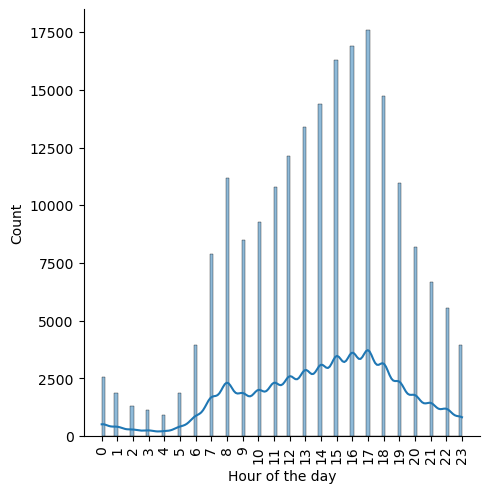

In [45]:
# Convert 'time_decimal' column to pandas DateTime object
result_df['time_decimal'] = pd.to_datetime(result_df['time'])

# Extract the hour from the DateTime and create a new column 'hour'
result_df['hour'] = result_df['time_decimal'].dt.hour

plt.figure(figsize=(12, 12))
sns.displot(data=result_df, x='hour', kde=True)

plt.xticks(range(24))  # To ensure all 24 hours are displayed on the x-axis
plt.xticks(rotation='vertical')
plt.xlabel('Hour of the day')
plt.show()

<Figure size 1000x1000 with 0 Axes>

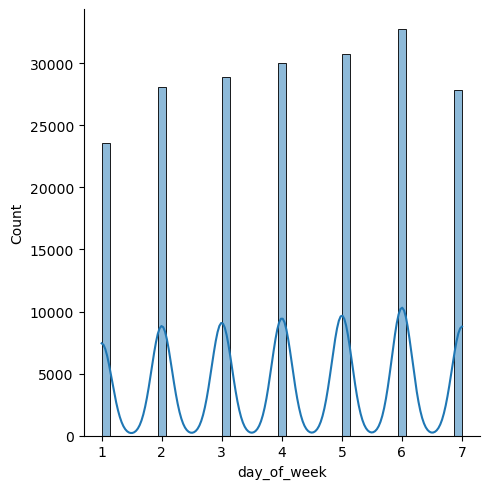

In [46]:
plt.figure(figsize=(10, 10))
sns.displot(data=result_df, x='day_of_week', kde=True)

In [47]:
day_name = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7:'Saturday'}
result_df['day_name'] = result_df['day_of_week'].map(day_name) #creating a new column in the dataframe

<Figure size 1000x1000 with 0 Axes>

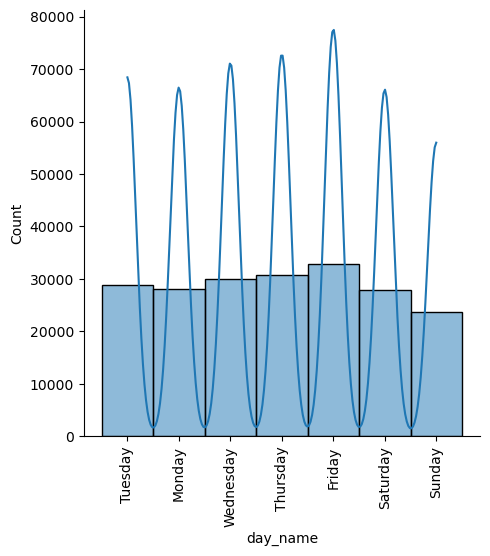

In [48]:
plt.figure(figsize=(10, 10))
sns.displot(data=result_df, x='day_name', kde=True)

# Set vertical x-axis tick labels
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

### 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc

In [49]:
result_df['vehicle_type'].unique()# it returns an array containing all the unique values present in the vehicle column.

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

In [50]:
motorcycles_df = result_df[result_df['vehicle_type'].isin([2,3,4,5])]#created DataFrame called motorcycles_df that contains rows where 
# the 'vehicle_type' column has values 2, 3, 4, or 5.

In [51]:
motorcycles_df

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid,formatted_time,time_decimal,hour,day_name
14,529718.0,192342.0,-0.127840,51.614971,1,3,2,1,01/01/2020,4,...,E01001530,Enfield 032D,Enfield 032D,2.086097e+05,2561.208221,be99c0ab-0d7c-40c5-a0e1-3016ab9d1ebb,2023-08-12 03:25:00,2023-08-12 03:25:00,3,Wednesday
47,531477.0,174550.0,-0.109087,51.454673,1,2,2,1,01/01/2020,4,...,E01003074,Lambeth 018E,Lambeth 018E,7.111224e+05,4143.283238,bb3e391c-2d32-4f1d-9924-8f1f07dd43b3,2023-08-12 08:00:00,2023-08-12 08:00:00,8,Wednesday
48,531043.0,176304.0,-0.114680,51.470537,1,3,1,1,01/01/2020,4,...,E01003186,Lambeth 007D,Lambeth 007D,2.087291e+05,2883.873114,b8fda99d-473d-4560-9e66-4f8e0c549b2b,2023-08-12 14:00:00,2023-08-12 14:00:00,14,Wednesday
52,528428.0,179923.0,-0.150994,51.503659,1,3,2,1,01/01/2020,4,...,E01004761,Westminster 018D,Westminster 018D,5.200770e+05,5894.348387,72d36791-acaf-4bec-8c86-cbd1c6f34feb,2023-08-12 14:37:00,2023-08-12 14:37:00,14,Wednesday
78,518467.0,185248.0,-0.292651,51.553691,1,3,1,1,01/01/2020,4,...,E01000635,Brent 020D,Brent 020D,2.324997e+05,2873.438850,cb76b7be-f085-4993-b597-992b0e048d4b,2023-08-12 19:05:00,2023-08-12 19:05:00,19,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201813,326810.0,310390.0,-3.084178,52.686250,63,2,3,3,20/09/2020,1,...,W01000497,Powys 005D,Powys 005D,3.213897e+07,33669.325752,9769c2cf-1894-4949-b3f2-c9f267aef9df,2023-08-12 12:27:00,2023-08-12 12:27:00,12,Sunday
201814,326810.0,310390.0,-3.084178,52.686250,63,2,3,3,20/09/2020,1,...,W01000497,Powys 005D,Powys 005D,3.213897e+07,33669.325752,9769c2cf-1894-4949-b3f2-c9f267aef9df,2023-08-12 12:27:00,2023-08-12 12:27:00,12,Sunday
201845,308810.0,285700.0,-3.343594,52.461618,63,3,1,1,11/10/2020,1,...,W01000447,Powys 007C,Powys 007C,8.820772e+07,58201.861965,c99fab4d-0dc3-485d-90b2-a8de766c30c0,2023-08-12 15:05:00,2023-08-12 15:05:00,15,Sunday
201872,323650.0,308060.0,-3.130375,52.664871,63,2,1,1,27/11/2020,6,...,W01000499,Powys 003B,Powys 003B,1.844787e+06,9572.019891,b3b99610-60f0-4d1b-be51-41daa2ff5836,2023-08-12 17:00:00,2023-08-12 17:00:00,17,Friday


<Figure size 1000x1000 with 0 Axes>

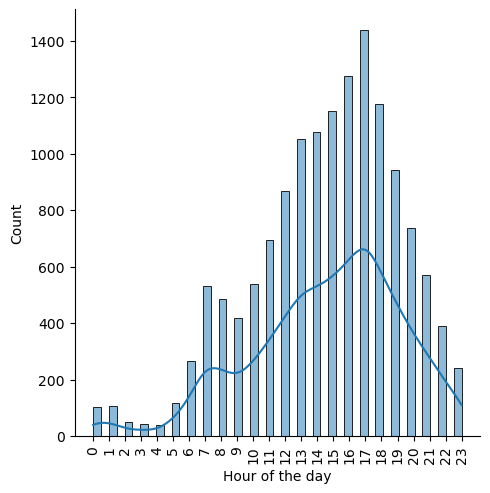

In [52]:
# Convert 'time_decimal' column to pandas DateTime object
motorcycles_df['time_decimal'] = pd.to_datetime(motorcycles_df['time'])

# Extract the hour from the DateTime and create a new column 'hour'
motorcycles_df['hour'] = motorcycles_df['time_decimal'].dt.hour

plt.figure(figsize=(10, 10))
sns.displot(data=motorcycles_df, x='hour', kde=True)

plt.xticks(range(24))  # To assist and show that all 24 hours are displayed on the x-axis
plt.xticks(rotation='vertical')
plt.xlabel('Hour of the day')
plt.show()


<Figure size 1200x1200 with 0 Axes>

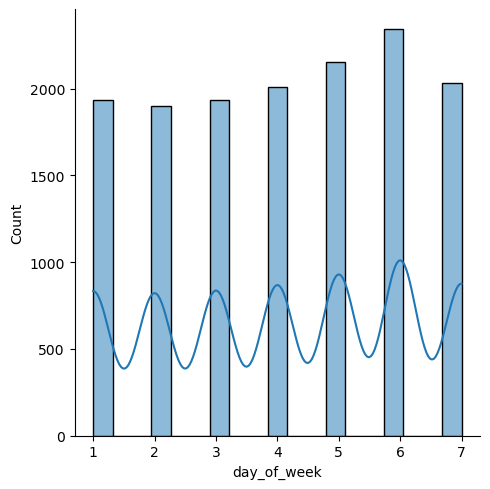

In [53]:
plt.figure(figsize=(12, 12))
sns.displot(data=motorcycles_df, x='day_of_week', kde=True)#plot day of the week

<Figure size 1000x1000 with 0 Axes>

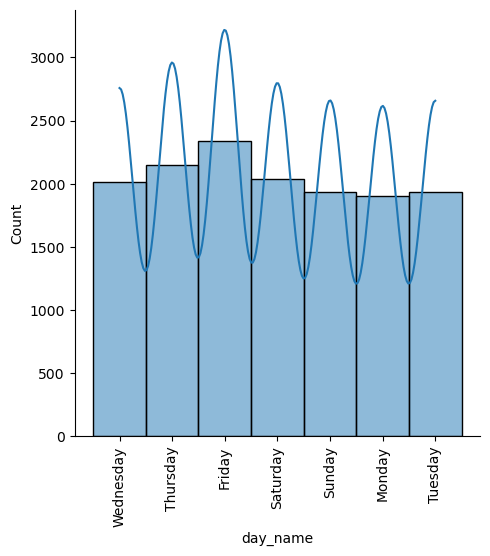

In [54]:
plt.figure(figsize=(10, 10))
sns.displot(data=motorcycles_df, x='day_name', kde=True)

# Set vertical x-axis tick labels
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

### 3.  For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [55]:
pedestrian_df = result_df[result_df['casualty_type'] == 3] #is used to filter the DataFrame result_df based on casualty=3

In [56]:
pedestrian_df

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid,formatted_time,time_decimal,hour,day_name
14,529718.0,192342.0,-0.127840,51.614971,1,3,2,1,01/01/2020,4,...,E01001530,Enfield 032D,Enfield 032D,2.086097e+05,2561.208221,be99c0ab-0d7c-40c5-a0e1-3016ab9d1ebb,2023-08-12 03:25:00,2023-08-12 03:25:00,3,Wednesday
15,529718.0,192342.0,-0.127840,51.614971,1,3,2,1,01/01/2020,4,...,E01001530,Enfield 032D,Enfield 032D,2.086097e+05,2561.208221,be99c0ab-0d7c-40c5-a0e1-3016ab9d1ebb,2023-08-12 03:25:00,2023-08-12 03:25:00,3,Wednesday
51,528428.0,179923.0,-0.150994,51.503659,1,3,2,1,01/01/2020,4,...,E01004761,Westminster 018D,Westminster 018D,5.200770e+05,5894.348387,72d36791-acaf-4bec-8c86-cbd1c6f34feb,2023-08-12 14:37:00,2023-08-12 14:37:00,14,Wednesday
52,528428.0,179923.0,-0.150994,51.503659,1,3,2,1,01/01/2020,4,...,E01004761,Westminster 018D,Westminster 018D,5.200770e+05,5894.348387,72d36791-acaf-4bec-8c86-cbd1c6f34feb,2023-08-12 14:37:00,2023-08-12 14:37:00,14,Wednesday
98,527038.0,170583.0,-0.174362,51.420033,1,3,2,1,01/01/2020,4,...,E01003371,Merton 005D,Merton 005D,1.209722e+05,2196.995201,ced02963-a705-4762-90ef-4d841d8a9d13,2023-08-12 14:29:00,2023-08-12 14:29:00,14,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201588,326810.0,310380.0,-3.084175,52.686160,63,2,2,1,25/04/2020,7,...,W01000497,Powys 005D,Powys 005D,3.213897e+07,33669.325752,9769c2cf-1894-4949-b3f2-c9f267aef9df,2023-08-12 15:58:00,2023-08-12 15:58:00,15,Saturday
201589,326810.0,310380.0,-3.084175,52.686160,63,2,2,1,25/04/2020,7,...,W01000497,Powys 005D,Powys 005D,3.213897e+07,33669.325752,9769c2cf-1894-4949-b3f2-c9f267aef9df,2023-08-12 15:58:00,2023-08-12 15:58:00,15,Saturday
201734,310130.0,286360.0,-3.324349,52.467769,63,3,1,1,21/08/2020,6,...,W01000447,Powys 007C,Powys 007C,8.820772e+07,58201.861965,c99fab4d-0dc3-485d-90b2-a8de766c30c0,2023-08-12 18:25:00,2023-08-12 18:25:00,18,Friday
201742,292680.0,252340.0,-3.570267,52.158879,63,2,1,1,06/08/2020,5,...,W01000450,Powys 014C,Powys 014C,2.235827e+08,111147.007277,930d97ee-70f0-40f2-bb8e-dee99a1beccb,2023-08-12 12:49:00,2023-08-12 12:49:00,12,Thursday


<Figure size 1000x1000 with 0 Axes>

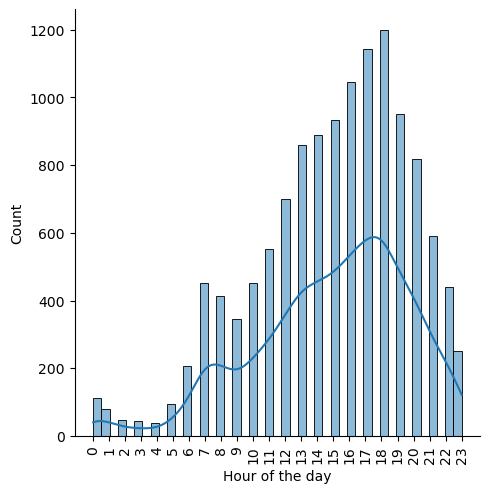

In [57]:
# Convert 'time_decimal' column to pandas DateTime object
pedestrian_df['time_decimal'] = pd.to_datetime(pedestrian_df['time'])

# Extract the hour from the DateTime and create a new column 'hour'
pedestrian_df['hour'] = pedestrian_df['time_decimal'].dt.hour

plt.figure(figsize=(10, 10))
sns.displot(data=pedestrian_df, x='hour', kde=True)

plt.xticks(range(24))  # To ensure all 24 hours are displayed on the x-axis
plt.xticks(rotation='vertical')
plt.xlabel('Hour of the day')
plt.show()#display the plot


<Figure size 1200x1200 with 0 Axes>

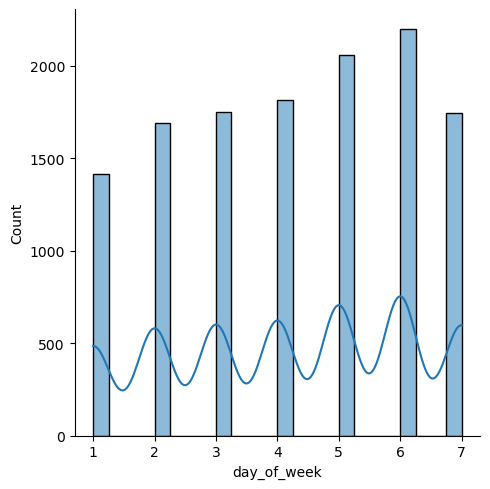

In [58]:
plt.figure(figsize=(12, 12))
sns.displot(data=pedestrian_df, x='day_of_week', kde=True)

<Figure size 1000x1000 with 0 Axes>

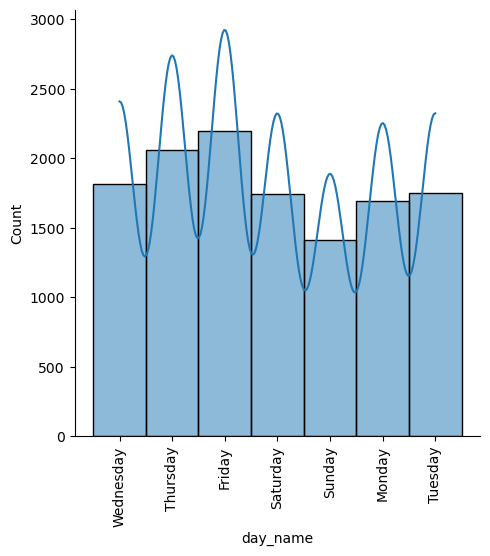

In [59]:
plt.figure(figsize=(10, 10))
sns.displot(data=pedestrian_df, x='day_name', kde=True)

# Setting vertical x-axis tick labels
plt.xticks(rotation='vertical')

plt.show()# Display the plot

### 4.Using the apriori algorithm, explore the impact of selected variables on accident severity. ?

In [60]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [61]:
severity_df = result_df[["accident_severity", "speed_limit", "weather_conditions", "light_conditions", "road_surface_conditions", "urban_or_rural_area", "junction_detail", "age_of_driver", "age_of_casualty"  ]]


In [62]:
severity_df

,accident_severity,speed_limit,weather_conditions,light_conditions,road_surface_conditions,urban_or_rural_area,junction_detail,age_of_driver,age_of_casualty
0,3,20,9,1,9,1,0,32,31
1,3,20,1,1,1,1,9,45,2
2,3,20,1,1,1,1,9,45,4
3,3,30,1,4,2,1,3,38,23
4,2,30,1,4,1,1,0,44,47
...,...,...,...,...,...,...,...,...,...
201938,1,60,1,6,2,2,0,19,51
201939,1,60,1,6,2,2,0,19,42
201940,1,60,1,6,2,2,0,19,12
201941,1,60,1,6,2,2,0,19,2


In [63]:
AccSeverity_df = pd.get_dummies(severity_df["accident_severity"],prefix="severity" )
AccSeverity_df

,severity_1,severity_2,severity_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
201938,1,0,0
201939,1,0,0
201940,1,0,0
201941,1,0,0


In [64]:
SpeedLimit_df = pd.get_dummies(severity_df["speed_limit"],prefix="speed")
SpeedLimit_df

,speed_20,speed_30,speed_40,speed_50,speed_60,speed_70
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
201938,0,0,0,0,1,0
201939,0,0,0,0,1,0
201940,0,0,0,0,1,0
201941,0,0,0,0,1,0


In [65]:
weather_df = pd.get_dummies(severity_df["weather_conditions"],prefix="weather")
weather_df

,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9
0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
201938,1,0,0,0,0,0,0,0,0
201939,1,0,0,0,0,0,0,0,0
201940,1,0,0,0,0,0,0,0,0
201941,1,0,0,0,0,0,0,0,0


In [66]:
LightCondition_df = pd.get_dummies(severity_df["light_conditions"],prefix="severity" )
LightCondition_df

,severity_1,severity_4,severity_5,severity_6,severity_7
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
201938,0,0,0,1,0
201939,0,0,0,1,0
201940,0,0,0,1,0
201941,0,0,0,1,0


In [67]:
roadSurfaceConditions_df = pd.get_dummies(severity_df["road_surface_conditions"],prefix="severity" )
roadSurfaceConditions_df

,severity_1,severity_2,severity_3,severity_4,severity_5,severity_9
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
201938,0,1,0,0,0,0
201939,0,1,0,0,0,0
201940,0,1,0,0,0,0
201941,0,1,0,0,0,0


In [68]:
urban_or_rural_area_df = pd.get_dummies(severity_df["urban_or_rural_area"],prefix="severity" )
urban_or_rural_area_df

,severity_1,severity_2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
201938,0,1
201939,0,1
201940,0,1
201941,0,1


In [69]:
junction_detail_df = pd.get_dummies(severity_df["junction_detail"],prefix="severity" )
junction_detail_df

,severity_-1,severity_0,severity_1,severity_2,severity_3,severity_5,severity_6,severity_7,severity_8,severity_9,severity_99
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
201938,0,1,0,0,0,0,0,0,0,0,0
201939,0,1,0,0,0,0,0,0,0,0,0
201940,0,1,0,0,0,0,0,0,0,0,0
201941,0,1,0,0,0,0,0,0,0,0,0


In [70]:
age_of_driver_df = pd.get_dummies(severity_df["age_of_driver"],prefix="severity" )
age_of_driver_df

,severity_3,severity_4,severity_5,severity_6,severity_7,severity_8,severity_9,severity_10,severity_11,severity_12,...,severity_91,severity_92,severity_93,severity_94,severity_95,severity_96,severity_97,severity_98,severity_99,severity_100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
age_of_casualty_df = pd.get_dummies(severity_df["age_of_casualty"],prefix="severity" )
age_of_casualty_df

,severity_0,severity_1,severity_2,severity_3,severity_4,severity_5,severity_6,severity_7,severity_8,severity_9,...,severity_90,severity_91,severity_92,severity_93,severity_94,severity_95,severity_96,severity_97,severity_98,severity_99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201941,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
def encode(cols, result_df):
    list = [] #empty list
    for col in cols:
        dummies = pd.get_dummies(result_df[col], prefix=col)
        list.append(dummies) #aadding dummies to the empty list
        
    return pd.concat(list, axis=1)


In [73]:
cols = ["accident_severity", "speed_limit", "weather_conditions", "light_conditions", "road_surface_conditions", "urban_or_rural_area", "junction_detail", "age_of_driver", "age_of_casualty"  ]

df_acc_onehot =  encode(cols, result_df)
df_acc_onehot

,accident_severity_1,accident_severity_2,accident_severity_3,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70,weather_conditions_1,...,age_of_casualty_90,age_of_casualty_91,age_of_casualty_92,age_of_casualty_93,age_of_casualty_94,age_of_casualty_95,age_of_casualty_96,age_of_casualty_97,age_of_casualty_98,age_of_casualty_99
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
201939,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
201940,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
201941,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
frequent_items = apriori(df_acc_onehot, min_support=0.2, use_colnames=True)
frequent_items["length"] = frequent_items["itemsets"].apply(lambda x: len(x))
frequent_items

C:\Users\USER\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.782676,(accident_severity_3),1
1,0.543762,(speed_limit_30),1
2,0.781671,(weather_conditions_1),1
3,0.711859,(light_conditions_1),1
4,0.205816,(light_conditions_4),1
...,...,...,...
86,0.222394,"(accident_severity_3, light_conditions_1, weat...",5
87,0.253690,"(accident_severity_3, weather_conditions_1, sp...",5
88,0.210644,"(accident_severity_3, light_conditions_1, spee...",5
89,0.270997,"(accident_severity_3, light_conditions_1, weat...",5


### Generating rules

In [75]:
rules = association_rules(frequent_items, metric="lift", min_threshold=0.5)
rules #frequent itemsets using the "lift" metric and a minimum threshold of 0.5. 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(accident_severity_3),(speed_limit_30),0.782676,0.543762,0.441877,0.564572,1.038270,0.016287,1.047791,0.169605
1,(speed_limit_30),(accident_severity_3),0.543762,0.782676,0.441877,0.812629,1.038270,0.016287,1.159859,0.080790
2,(accident_severity_3),(weather_conditions_1),0.782676,0.781671,0.608701,0.777718,0.994943,-0.003094,0.982216,-0.022854
3,(weather_conditions_1),(accident_severity_3),0.781671,0.782676,0.608701,0.778718,0.994943,-0.003094,0.982113,-0.022751
4,(light_conditions_1),(accident_severity_3),0.711859,0.782676,0.563253,0.791242,1.010944,0.006098,1.041032,0.037571
...,...,...,...,...,...,...,...,...,...,...
627,(light_conditions_1),"(road_surface_conditions_1, urban_or_rural_are...",0.711859,0.311197,0.240404,0.337713,1.085209,0.018876,1.040038,0.272500
628,(weather_conditions_1),"(road_surface_conditions_1, urban_or_rural_are...",0.781671,0.255260,0.240404,0.307552,1.204857,0.040875,1.075517,0.778761
629,(speed_limit_30),"(road_surface_conditions_1, urban_or_rural_are...",0.543762,0.327335,0.240404,0.442113,1.350644,0.062412,1.205737,0.569030
630,(road_surface_conditions_1),"(speed_limit_30, urban_or_rural_area_1, light_...",0.692086,0.269913,0.240404,0.347362,1.286941,0.053601,1.118671,0.724112


In [153]:
# Filter association rules related to accident severity
severity_rules = rules[
    (rules['antecedents'].apply(lambda x: any('severity' in item for item in x))) |
    (rules['consequents'].apply(lambda x: any('severity' in item for item in x)))
]

severity_rules#Display the filtered rules related to accident severity

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(accident_severity_3),(speed_limit_30),0.782676,0.543762,0.441877,0.564572,1.038270,0.016287,1.047791,0.169605
1,(speed_limit_30),(accident_severity_3),0.543762,0.782676,0.441877,0.812629,1.038270,0.016287,1.159859,0.080790
2,(accident_severity_3),(weather_conditions_1),0.782676,0.781671,0.608701,0.777718,0.994943,-0.003094,0.982216,-0.022854
3,(weather_conditions_1),(accident_severity_3),0.781671,0.782676,0.608701,0.778718,0.994943,-0.003094,0.982113,-0.022751
4,(light_conditions_1),(accident_severity_3),0.711859,0.782676,0.563253,0.791242,1.010944,0.006098,1.041032,0.037571
...,...,...,...,...,...,...,...,...,...,...
597,(accident_severity_3),"(road_surface_conditions_1, urban_or_rural_are...",0.782676,0.327335,0.270997,0.346244,1.057768,0.014800,1.028924,0.251298
598,(light_conditions_1),"(road_surface_conditions_1, urban_or_rural_are...",0.711859,0.350376,0.270997,0.380689,1.086516,0.021579,1.048947,0.276349
599,(weather_conditions_1),"(road_surface_conditions_1, light_conditions_1...",0.781671,0.289116,0.270997,0.346690,1.199136,0.045003,1.088126,0.760624
600,(road_surface_conditions_1),"(light_conditions_1, urban_or_rural_area_1, ac...",0.692086,0.304378,0.270997,0.391566,1.286445,0.060341,1.143298,0.723139


### 5.Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?

In [76]:
df=result_df[result_df['police_force']==16]
df #display filtered dataframe

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid,formatted_time,time_decimal,hour,day_name
83493,506050.0,428813.0,-0.393424,53.744936,16,3,2,1,02/01/2020,5,...,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff,2023-08-12 11:20:00,2023-08-12 11:20:00,11,Thursday
83494,506050.0,428813.0,-0.393424,53.744936,16,3,2,1,02/01/2020,5,...,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff,2023-08-12 11:20:00,2023-08-12 11:20:00,11,Thursday
83495,497660.0,402806.0,-0.528743,53.512895,16,3,1,1,02/01/2020,5,...,E01013325,North Lincolnshire 022C,North Lincolnshire 022C,2.922303e+07,35402.961317,7ef78052-d8cd-44b7-83fe-911922ac653e,2023-08-12 16:17:00,2023-08-12 16:17:00,16,Thursday
83496,510449.0,434112.0,-0.324858,53.791630,16,2,1,1,02/01/2020,5,...,E01012788,Kingston upon Hull 002E,Kingston upon Hull 002E,4.380009e+05,4731.122554,3976daa3-b707-42ec-80fd-cc3ee771e32f,2023-08-12 17:30:00,2023-08-12 17:30:00,17,Thursday
83497,526236.0,410340.0,-0.095008,53.574501,16,3,1,1,02/01/2020,5,...,E01013220,North East Lincolnshire 003C,North East Lincolnshire 003C,9.608273e+05,7574.743799,3fd9635e-6911-4973-93f9-d797fcda91ae,2023-08-12 22:50:00,2023-08-12 22:50:00,22,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87473,485978.0,408912.0,-0.703181,53.569801,16,3,2,2,08/12/2020,3,...,E01013286,North Lincolnshire 005A,North Lincolnshire 005A,7.579247e+06,13518.945251,f88ba1d4-39d2-404c-bbbb-d6e539bd97ca,2023-08-12 12:41:00,2023-08-12 12:41:00,12,Tuesday
87474,485978.0,408912.0,-0.703181,53.569801,16,3,2,2,08/12/2020,3,...,E01013286,North Lincolnshire 005A,North Lincolnshire 005A,7.579247e+06,13518.945251,f88ba1d4-39d2-404c-bbbb-d6e539bd97ca,2023-08-12 12:41:00,2023-08-12 12:41:00,12,Tuesday
87475,485978.0,408912.0,-0.703181,53.569801,16,3,2,2,08/12/2020,3,...,E01013286,North Lincolnshire 005A,North Lincolnshire 005A,7.579247e+06,13518.945251,f88ba1d4-39d2-404c-bbbb-d6e539bd97ca,2023-08-12 12:41:00,2023-08-12 12:41:00,12,Tuesday
87476,509443.0,428632.0,-0.342063,53.742609,16,3,2,1,29/12/2020,3,...,E01012854,Kingston upon Hull 029C,Kingston upon Hull 029C,2.187749e+06,8807.661242,9de97052-73e0-4184-8153-96c1b89e75ae,2023-08-12 20:18:00,2023-08-12 20:18:00,20,Tuesday


### Using" latitude and longitude" columns to run clustering on this data

In [77]:
distribution_df = df[["longitude", "latitude"]]
distribution_df  #creation of a new DataFrame called distribution_df which contains latitude and longitude

,longitude,latitude
83493,-0.393424,53.744936
83494,-0.393424,53.744936
83495,-0.528743,53.512895
83496,-0.324858,53.791630
83497,-0.095008,53.574501
...,...,...
87473,-0.703181,53.569801
87474,-0.703181,53.569801
87475,-0.703181,53.569801
87476,-0.342063,53.742609


In [78]:
distribution_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 83493 to 87477
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  3985 non-null   float64
 1   latitude   3985 non-null   float64
dtypes: float64(2)
memory usage: 93.4 KB


Text(0.5, 1.0, 'Elbow curve')

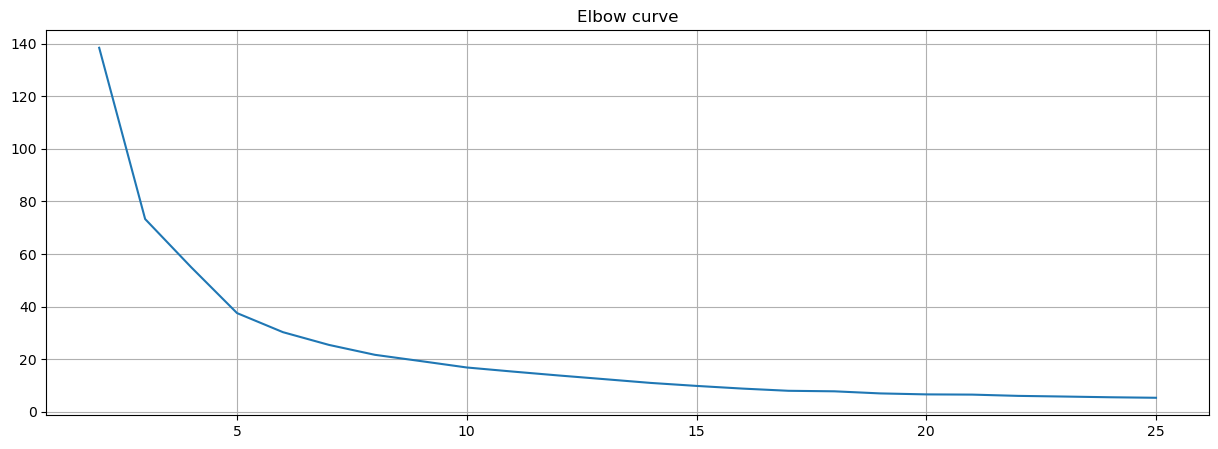

In [79]:
X = distribution_df
distorsions = []
for k in range(2, 26):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 26), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [80]:
kmeans= KMeans(n_clusters=5)

In [81]:
kmeans.fit(distribution_df) #performing K-Means clustering on the data in the DataFrame distribution_df

KMeans(n_clusters=5)

In [82]:
labels = kmeans.predict(distribution_df)
centroids = kmeans.cluster_centers_#predicting the cluster labels for each data point and to obtain the centroids of the clusters

In [83]:
np.unique(labels)

array([0, 1, 2, 3, 4])

In [84]:
labels

array([0, 0, 3, ..., 3, 0, 0])

In [85]:
centroids

array([[-0.36216483, 53.75920259],
       [-0.81096243, 53.81133825],
       [-0.08914657, 53.57574388],
       [-0.64480708, 53.58344785],
       [-0.27041002, 54.0372802 ]])

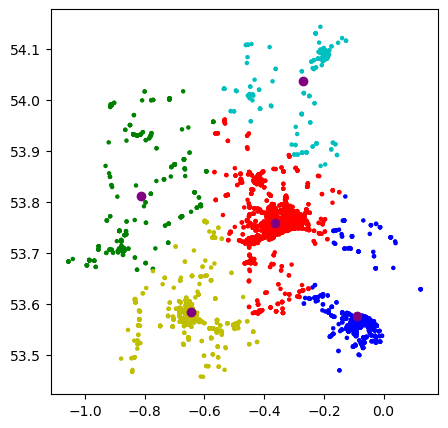

In [86]:
fig = plt.figure(figsize=(5, 5))
colmap = {1: "r", 2: "g", 3: "b", 4:"y", 5: "c"}
colors = list(map(lambda x: colmap[x + 1], labels))

# Assuming you have the cluster labels stored in the 'labels' variable

plt.scatter(distribution_df["longitude"], distribution_df["latitude"], s=5, c=colors)

# Assuming you have the centroids of the three clusters stored in the 'centroids' variable

plt.scatter(centroids[:, 0], centroids[:, 1], color="purple")
plt.show()


### 6.Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?

### checking outliners using the entire dataset

In [87]:
from sklearn.ensemble import IsolationForest

In [88]:
distribution_df = result_df[["longitude", "latitude"]]
distribution_df  #creation of a new DataFrame called distribution_df which contains latitude and longitude

,longitude,latitude
0,-0.254001,51.462262
1,-0.139253,51.470327
2,-0.139253,51.470327
3,-0.178719,51.529614
4,-0.001683,51.541210
...,...,...
201938,-3.110141,52.232798
201939,-3.110141,52.232798
201940,-3.110141,52.232798
201941,-3.110141,52.232798


In [89]:
numerical_distribution_df = distribution_df.select_dtypes(include=np.number)
numerical_distribution_df.head()

,longitude,latitude
0,-0.254001,51.462262
1,-0.139253,51.470327
2,-0.139253,51.470327
3,-0.178719,51.529614
4,-0.001683,51.541210


In [90]:
numerical_distribution_df.isna().sum()

longitude    0
latitude     0
dtype: int64

In [91]:
ranst = np.random.RandomState(0)
model_entire = IsolationForest(max_samples=100, random_state=ranst, contamination=.05)
model_entire.fit(numerical_distribution_df)

scores_entire = model_entire.decision_function(numerical_distribution_df)
anomalies = model_entire.predict(numerical_distribution_df)
anomalies = pd.Series(anomalies, index = numerical_distribution_df.index).replace([-1,1], [1,0])
numerical_distribution_df['EntireDataset_Outliers'] = anomalies
anomalies = numerical_distribution_df[anomalies==1]

In [92]:
anomalies

,longitude,latitude,EntireDataset_Outliers
43457,-3.493283,54.525650,1
43458,-3.493283,54.525650,1
43459,-3.493283,54.525650,1
43460,-3.493283,54.525650,1
43461,-3.493283,54.525650,1
...,...,...,...
201456,-5.016290,51.788267,1
201457,-5.016290,51.788267,1
201458,-4.997836,51.942805,1
201459,-4.811079,52.016394,1


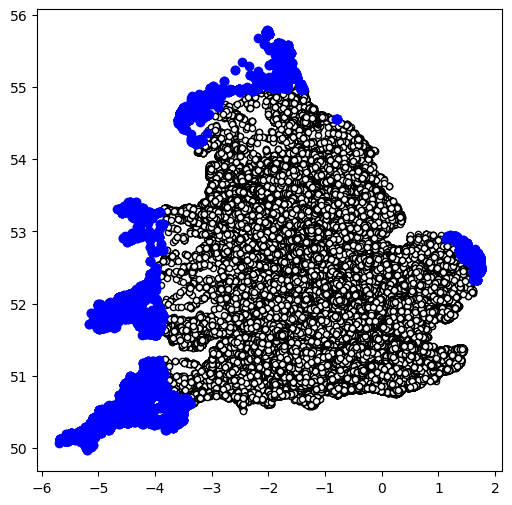

In [93]:
plt.figure(figsize=(6,6))
plt.scatter(numerical_distribution_df["longitude"], numerical_distribution_df["latitude"], c="white", s=20, edgecolors="k")
plt.scatter(anomalies["longitude"], anomalies["latitude"], c="blue")

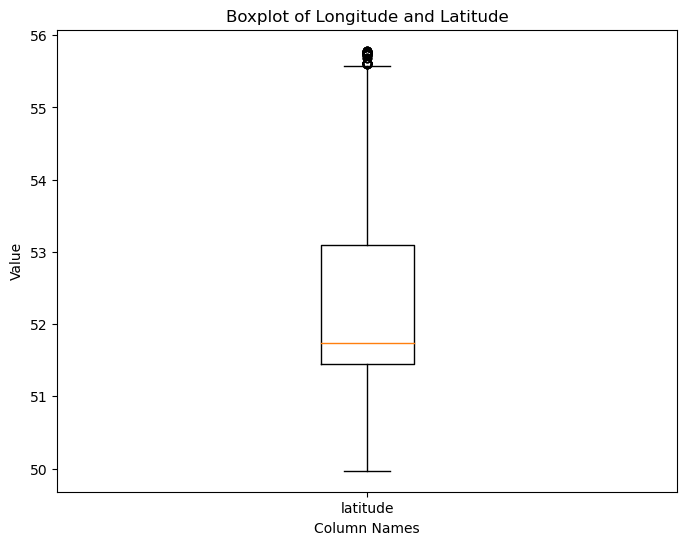

In [94]:
# Sample data for distribution_df
data =  result_df[ "latitude"]

# Creating the DataFrame
distribution_df = pd.DataFrame(data)

# Plotting the boxplot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.boxplot(distribution_df.values, labels=distribution_df.columns)
plt.title('Boxplot of Longitude and Latitude')
plt.ylabel('Value')
plt.xlabel('Column Names')
plt.show()


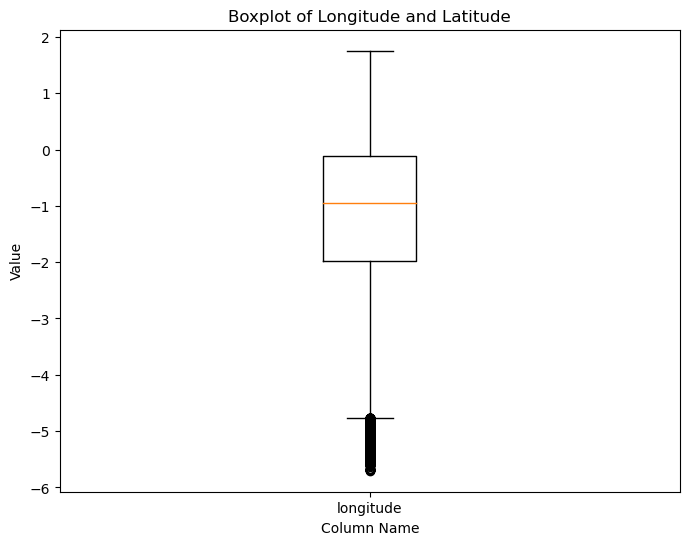

In [95]:
# Sample data for distribution_df
data =  result_df[ "longitude"]

# Creating the DataFrame
distribution_df = pd.DataFrame(data)

# Plotting the boxplot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.boxplot(distribution_df.values, labels=distribution_df.columns)
plt.title('Boxplot of Longitude and Latitude')
plt.ylabel('Value')
plt.xlabel('Column Name')
plt.show()

In [96]:
numerical_distribution_df.loc[numerical_distribution_df['EntireDataset_Outliers']==1]

,longitude,latitude,EntireDataset_Outliers
43457,-3.493283,54.525650,1
43458,-3.493283,54.525650,1
43459,-3.493283,54.525650,1
43460,-3.493283,54.525650,1
43461,-3.493283,54.525650,1
...,...,...,...
201456,-5.016290,51.788267,1
201457,-5.016290,51.788267,1
201458,-4.997836,51.942805,1
201459,-4.811079,52.016394,1


### 7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

In [97]:
df_acc_balanced = result_df.drop(['accident_severity'], axis = 1)

In [98]:
y_label = result_df['accident_severity'] == 1 #target variable

In [99]:
y_label.value_counts() #count of target variable

False    198271
True       3672
Name: accident_severity, dtype: int64

### Now, we have to balance the dataset

In [100]:
df_acc_balanced = result_df.drop(['did_police_officer_attend_scene_of_accident','accident_severity', "casualty_severity"],axis = 1) #The drop method in Pandas is used to remove these two columns from a DataFrame.

In [101]:
from imblearn.under_sampling import RandomUnderSampler

In [102]:
df_acc_balanced

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid,formatted_time,time_decimal,hour,day_name
0,521389.0,175144.0,-0.254001,51.462262,1,1,1,04/02/2020,3,09:00,...,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e,2023-08-12 09:00:00,2023-08-12 09:00:00,9,Tuesday
1,529337.0,176237.0,-0.139253,51.470327,1,1,2,27/04/2020,2,13:55,...,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6,2023-08-12 13:55:00,2023-08-12 13:55:00,13,Monday
2,529337.0,176237.0,-0.139253,51.470327,1,1,2,27/04/2020,2,13:55,...,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6,2023-08-12 13:55:00,2023-08-12 13:55:00,13,Monday
3,526432.0,182761.0,-0.178719,51.529614,1,1,1,01/01/2020,4,01:25,...,E01004726,Westminster 003C,Westminster 003C,1.857269e+05,2698.692831,e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18,2023-08-12 01:25:00,2023-08-12 01:25:00,1,Wednesday
4,538676.0,184371.0,-0.001683,51.541210,1,1,1,01/01/2020,4,01:50,...,E01003617,Newham 012B,Newham 012B,2.326906e+05,3013.438191,3e1979c9-8863-4982-afa5-7a6de00635d7,2023-08-12 01:50:00,2023-08-12 01:50:00,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,324280.0,259980.0,-3.110141,52.232798,63,4,6,12/12/2020,7,17:30,...,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef,2023-08-12 17:30:00,2023-08-12 17:30:00,17,Saturday
201939,324280.0,259980.0,-3.110141,52.232798,63,4,6,12/12/2020,7,17:30,...,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef,2023-08-12 17:30:00,2023-08-12 17:30:00,17,Saturday
201940,324280.0,259980.0,-3.110141,52.232798,63,4,6,12/12/2020,7,17:30,...,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef,2023-08-12 17:30:00,2023-08-12 17:30:00,17,Saturday
201941,324280.0,259980.0,-3.110141,52.232798,63,4,6,12/12/2020,7,17:30,...,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef,2023-08-12 17:30:00,2023-08-12 17:30:00,17,Saturday


In [103]:
df_acc_balanced, y_balanced = RandomUnderSampler().fit_resample(df_acc_balanced, y_label)#used in imbalanced classification tasks to reduce the majority class instances and balance the class distribution.

In [104]:
df_acc_balanced

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid,formatted_time,time_decimal,hour,day_name
200910,239710.0,242560.0,-4.339422,52.058182,63,2,1,31/01/2020,6,07:00,...,W01000522,Ceredigion 010B,Ceredigion 010B,6.081178e+07,48462.294851,bacddb51-e14b-4992-afb4-104c96ad9a77,2023-08-12 07:00:00,2023-08-12 07:00:00,7,Friday
70879,386592.0,461711.0,-2.206288,54.051196,12,2,3,24/08/2020,2,15:30,...,E01027562,Craven 002A,Craven 002A,1.491453e+08,94399.385478,40afb62a-b53a-42a6-9111-4c1c3a65db49,2023-08-12 15:30:00,2023-08-12 15:30:00,15,Monday
199009,306161.0,175829.0,-3.352509,51.473614,62,2,2,08/07/2020,4,21:57,...,W01001113,The Vale of Glamorgan 003A,Bro Morgannwg 003A,4.390712e+07,36658.514283,683a32b0-c708-458e-bfc2-7bc0bb469b47,2023-08-12 21:57:00,2023-08-12 21:57:00,21,Wednesday
113621,497512.0,371274.0,-0.540688,53.229587,32,1,1,06/02/2020,5,13:10,...,E01026143,Lincoln 005B,Lincoln 005B,3.848051e+05,3254.930422,2bbc5101-71f4-4ab6-80e3-7f5beafb4dc1,2023-08-12 13:10:00,2023-08-12 13:10:00,13,Thursday
3768,540483.0,181762.0,0.023316,51.517319,1,3,3,02/02/2020,1,05:12,...,E01003509,Newham 031C,Newham 031C,1.042896e+05,1576.654015,2cdbd72c-adca-4eeb-8eaf-55d6f2b32532,2023-08-12 05:12:00,2023-08-12 05:12:00,5,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,324280.0,259980.0,-3.110141,52.232798,63,4,6,12/12/2020,7,17:30,...,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef,2023-08-12 17:30:00,2023-08-12 17:30:00,17,Saturday
201939,324280.0,259980.0,-3.110141,52.232798,63,4,6,12/12/2020,7,17:30,...,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef,2023-08-12 17:30:00,2023-08-12 17:30:00,17,Saturday
201940,324280.0,259980.0,-3.110141,52.232798,63,4,6,12/12/2020,7,17:30,...,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef,2023-08-12 17:30:00,2023-08-12 17:30:00,17,Saturday
201941,324280.0,259980.0,-3.110141,52.232798,63,4,6,12/12/2020,7,17:30,...,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef,2023-08-12 17:30:00,2023-08-12 17:30:00,17,Saturday


### FEATURE SELECTION

In [105]:
df_acc_balanced = df_acc_balanced.select_dtypes([np.number])# using Pandas to select only the columns with numerical data types from the DataFrame df_acc_balanced.

In [106]:
df_acc_balanced #showing df_acc_balanced dataframe

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,...,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,objectid,shape__area,shape__length,hour
200910,239710.0,242560.0,-4.339422,52.058182,63,2,1,6,750,3,...,0,0,0,9,3,7,33004,6.081178e+07,48462.294851,7
70879,386592.0,461711.0,-2.206288,54.051196,12,2,3,2,180,6,...,0,0,0,5,1,9,27562,1.491453e+08,94399.385478,15
199009,306161.0,175829.0,-3.352509,51.473614,62,2,2,4,746,6,...,0,0,0,9,1,2,33595,4.390712e+07,36658.514283,21
113621,497512.0,371274.0,-0.540688,53.229587,32,1,1,5,352,6,...,0,0,0,0,1,9,26143,3.848051e+05,3254.930422,13
3768,540483.0,181762.0,0.023316,51.517319,1,3,3,1,17,3,...,1,0,0,8,1,2,3509,1.042896e+05,1576.654015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,324280.0,259980.0,-3.110141,52.232798,63,4,6,7,753,3,...,0,0,0,9,3,7,32966,1.535530e+08,81092.977857,17
201939,324280.0,259980.0,-3.110141,52.232798,63,4,6,7,753,3,...,1,0,0,9,3,7,32966,1.535530e+08,81092.977857,17
201940,324280.0,259980.0,-3.110141,52.232798,63,4,6,7,753,3,...,2,0,0,9,3,7,32966,1.535530e+08,81092.977857,17
201941,324280.0,259980.0,-3.110141,52.232798,63,4,6,7,753,3,...,2,0,0,9,3,7,32966,1.535530e+08,81092.977857,17


In [107]:
from sklearn.feature_selection import SelectKBest, f_classif

In [108]:
model = SelectKBest(f_classif, k = 10)#SelectKBest picks the top k features based on univariate statistical tests

In [109]:
model.fit(df_acc_balanced, y_balanced)#To fit the model to the data 

SelectKBest()

In [110]:
mask = model.get_support()#Once the SelectKBest model has been fitted, the code you gave obtains a boolean mask that indicates the selected features. 

In [111]:
name = model.feature_names_in_[mask]#The boolean mask is used to get the names of the features that have been selected.

In [112]:
scores = model.scores_[mask]#This fits the SelectKBest model and then extracts the F-statistic scores of the chosen features.


### Bar chart Plot of features and scores

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'number_of_casualties'),
  Text(1, 0, 'speed_limit'),
  Text(2, 0, 'second_road_class'),
  Text(3, 0, 'urban_or_rural_area'),
  Text(4, 0, 'junction_location'),
  Text(5, 0, 'sex_of_driver'),
  Text(6, 0, 'age_band_of_driver'),
  Text(7, 0, 'objectid'),
  Text(8, 0, 'shape__area'),
  Text(9, 0, 'shape__length')])

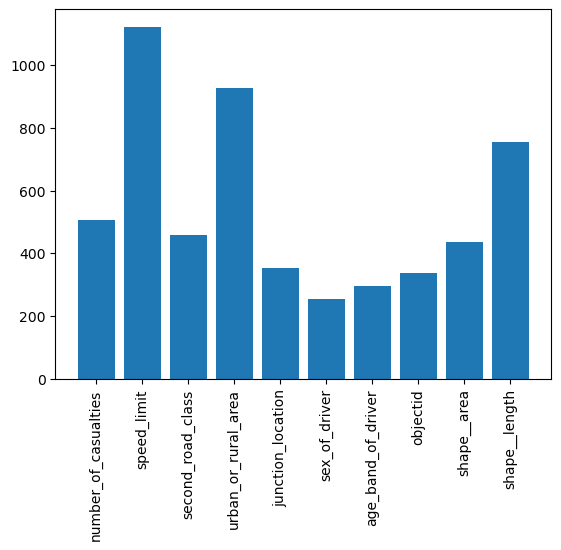

In [113]:
plt.bar(name,scores)
plt.xticks(rotation = 'vertical')

### Training of a Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df_acc_balanced, y_balanced, test_size=0.2, random_state=42)#train split method


In [116]:
# Create a DecisionTreeClassifier instance with specific hyperparameters
DecTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=100)

In [117]:
DecTree

DecisionTreeClassifier(min_samples_leaf=100)

In [118]:
Result_DecTree = cross_validate(DecTree,X_train, y_train, cv = 10, scoring = 'accuracy', return_estimator = True)

In [119]:
Result_DecTree

{'fit_time': array([0.15789366, 0.17189074, 0.12492204, 0.12992001, 0.11692834,
        0.12992024, 0.13591599, 0.17389035, 0.11193299, 0.12192512]),
 'score_time': array([0.00699663, 0.00299907, 0.00299883, 0.00399709, 0.00299835,
        0.00499749, 0.00599813, 0.00300002, 0.00399756, 0.00299788]),
 'estimator': [DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100)],
 'test_score': array([0.73639456, 0.7244898 , 0.73639456, 0.70068027, 0.71428571,
        0.7274276 , 0.72913118, 0.72061329, 0.73935264, 0.7427598 ])}

In [120]:
Result_DecTree['test_score']

array([0.73639456, 0.7244898 , 0.73639456, 0.70068027, 0.71428571,
       0.7274276 , 0.72913118, 0.72061329, 0.73935264, 0.7427598 ])

In [121]:
X_test

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,...,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,objectid,shape__area,shape__length,hour
121666,522848.0,308018.0,-0.185260,52.656000,35,5,1,6,394,3,...,0,0,0,5,1,5,15630,3.922701e+07,36398.581052,5
121388,481665.0,269573.0,-0.803331,52.318210,34,2,3,3,386,3,...,0,0,0,9,-1,-1,27353,2.435635e+07,29696.659868,13
106978,421852.0,368426.0,-1.674244,53.212468,30,1,1,2,329,6,...,0,0,0,0,1,1,19601,1.064987e+06,6863.645016,17
196830,330358.0,210312.0,-3.011051,51.787117,61,2,4,5,732,3,...,2,0,0,9,2,6,34046,2.958335e+07,39400.183209,20
161650,636527.0,167807.0,1.396127,51.360064,46,2,1,1,541,6,...,2,0,0,9,1,1,24691,2.127663e+06,8204.686954,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153664,458642.0,132623.0,-1.164043,51.089926,44,2,1,6,502,6,...,0,0,0,0,3,7,23281,9.794650e+05,7070.696869,12
166876,578633.0,154543.0,0.558936,51.262054,46,2,1,6,536,6,...,0,0,0,9,1,1,24350,3.532226e+06,11188.858403,10
55884,384833.0,394561.0,-2.229829,53.447608,6,2,6,4,102,5,...,2,0,0,8,1,3,5180,5.166271e+05,5225.810551,3
90132,394182.0,288263.0,-2.087112,52.492261,20,2,1,7,303,6,...,0,0,0,0,1,5,9873,4.577227e+05,4903.296223,10


In [122]:
X_train

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,...,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,objectid,shape__area,shape__length,hour
153898,459783.0,86924.0,-1.155219,50.678902,44,2,1,2,505,6,...,0,0,0,9,3,4,17289,1.426219e+07,21042.302531,16
88026,474504.0,518032.0,-0.849638,54.552075,17,2,2,6,241,3,...,0,0,0,9,3,2,12134,1.481970e+07,28911.036623,17
116507,496501.0,392516.0,-0.549370,53.420648,32,6,3,2,356,3,...,0,0,0,9,1,8,26386,3.514176e+07,27189.377754,17
191223,385183.0,149256.0,-2.213639,51.242280,54,2,1,6,635,3,...,0,0,0,1,3,5,32054,1.168400e+07,25264.994418,14
103334,404142.0,246258.0,-1.940919,52.114641,22,3,2,3,277,3,...,1,0,0,9,3,6,32389,1.226710e+07,18810.652877,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113466,528173.0,332391.0,-0.097063,52.873754,32,4,3,3,350,3,...,1,0,0,9,3,3,26017,2.782968e+07,34752.244680,18
114754,535586.0,379418.0,0.032808,53.294405,32,3,8,4,351,3,...,2,0,0,9,1,1,26070,1.346656e+08,76529.919820,18
116523,496501.0,392516.0,-0.549370,53.420648,32,6,3,2,356,3,...,0,0,0,9,1,10,26386,3.514176e+07,27189.377754,17
109594,437240.0,331831.0,-1.448046,52.882676,30,1,1,2,323,3,...,0,0,0,9,1,1,13517,5.039188e+05,4705.401096,1


In [123]:
y_train

153898    False
88026     False
116507     True
191223    False
103334     True
          ...  
113466     True
114754     True
116523     True
109594    False
200111     True
Name: accident_severity, Length: 5875, dtype: bool

In [124]:
y_test

121666     True
121388     True
106978    False
196830     True
161650    False
          ...  
153664    False
166876    False
55884      True
90132      True
62963      True
Name: accident_severity, Length: 1469, dtype: bool

### Fitting of the classifier

In [125]:
DecTree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

### Prediction of the classifier 

In [126]:
y_pred=DecTree.predict(X_test)

In [127]:
y_pred

array([ True,  True, False, ..., False,  True,  True])

In [128]:
classifier_accuracy = round(DecTree.score(X_train, y_train) * 100,2) 

In [129]:
classifier_accuracy#accuracy of the decision tree classifier model

75.57

### Evaluation of the classifier

<Axes: >

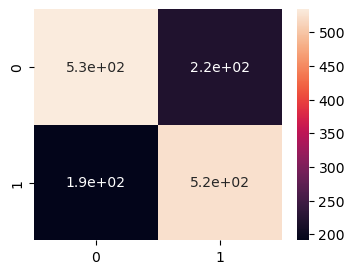

In [130]:
plt.figure(figsize= (4,3))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.74      0.71      0.72       754
        True       0.70      0.73      0.72       715

    accuracy                           0.72      1469
   macro avg       0.72      0.72      0.72      1469
weighted avg       0.72      0.72      0.72      1469



In [132]:
feature_importances = DecTree.feature_importances_ #feature importances from the DecisionTreeClassifier

feature_names = DecTree.feature_names_in_

# Creation of  a DataFrame to store feature names and their corresponding importances
relevance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

relevance_df = relevance_df.sort_values(by='Importance', ascending=False)# Sorting the DataFrame in descending order of feature importances

relevance_df# Display the DataFrame


,Feature,Importance
12,speed_limit,0.375007
6,number_of_casualties,0.115611
60,casualty_type,0.094004
65,shape__length,0.088693
53,age_of_casualty,0.086954
...,...,...
39,vehicle_left_hand_drive,0.000000
41,sex_of_driver,0.000000
42,age_of_driver,0.000000
43,age_band_of_driver,0.000000


In [133]:
relevance_df.head(14)

,Feature,Importance
12,speed_limit,0.375007
6,number_of_casualties,0.115611
60,casualty_type,0.094004
65,shape__length,0.088693
53,age_of_casualty,0.086954
3,latitude,0.033348
16,second_road_number,0.023309
10,first_road_number,0.021302
63,objectid,0.018968
5,number_of_vehicles,0.018049


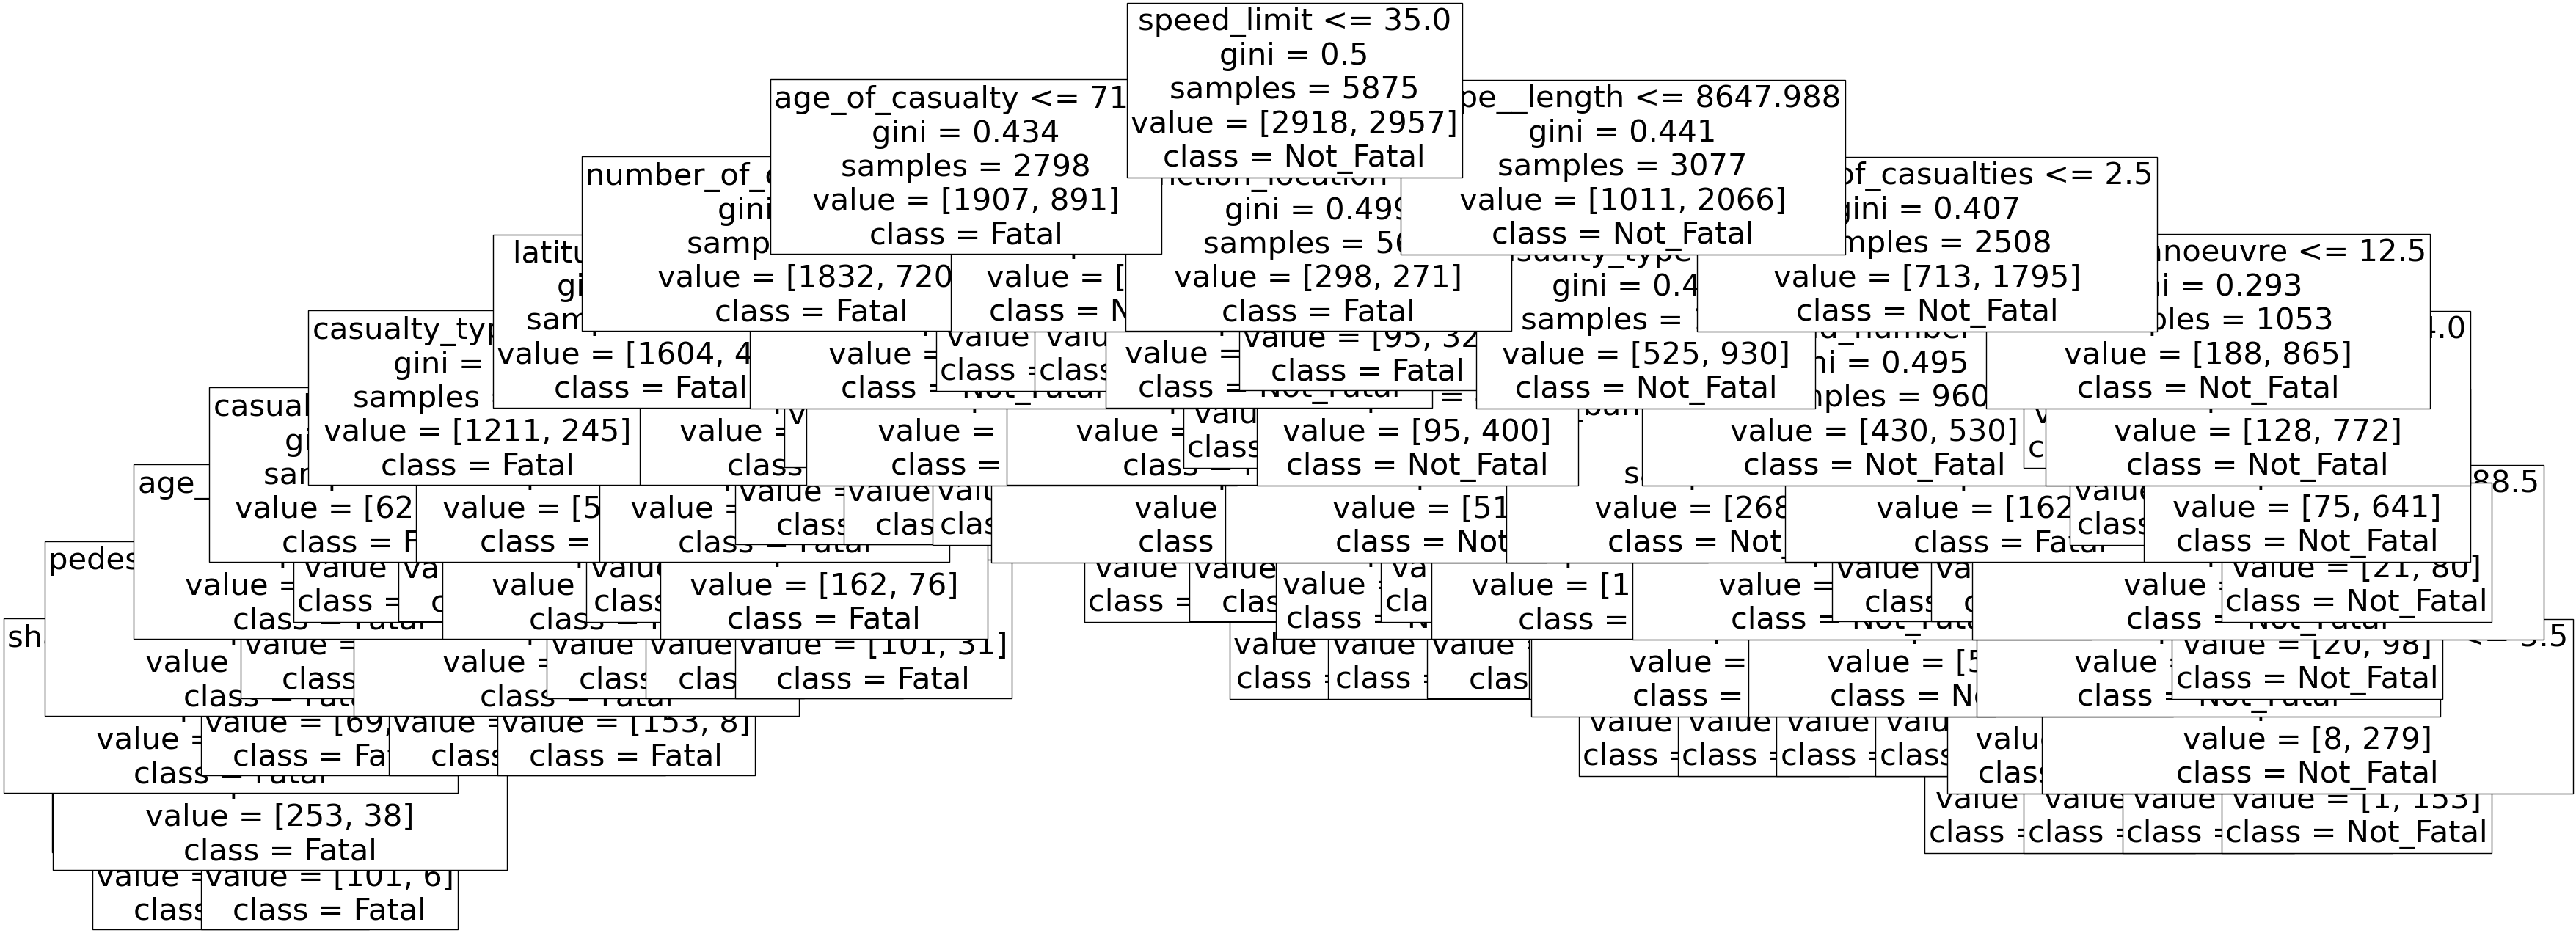

In [134]:
feature_importances = DecTree.feature_importances_ # feature importances from the DecisionTreeClassifier model

feature_names = DecTree.feature_names_in_

# Creation of a DataFrame to store feature names and their corresponding importances
relevance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame in descending order of feature importances
relevance_df = relevance_df.sort_values(by='Importance', ascending=False)

feature_names_list = list(feature_names) # Convert the feature_names array to a list

# Visualize the decision tree
plt.figure(figsize=(40, 15))
plot_tree(DecTree, feature_names=feature_names_list, class_names=["Fatal", "Not_Fatal"], fontsize=30)
plt.show()


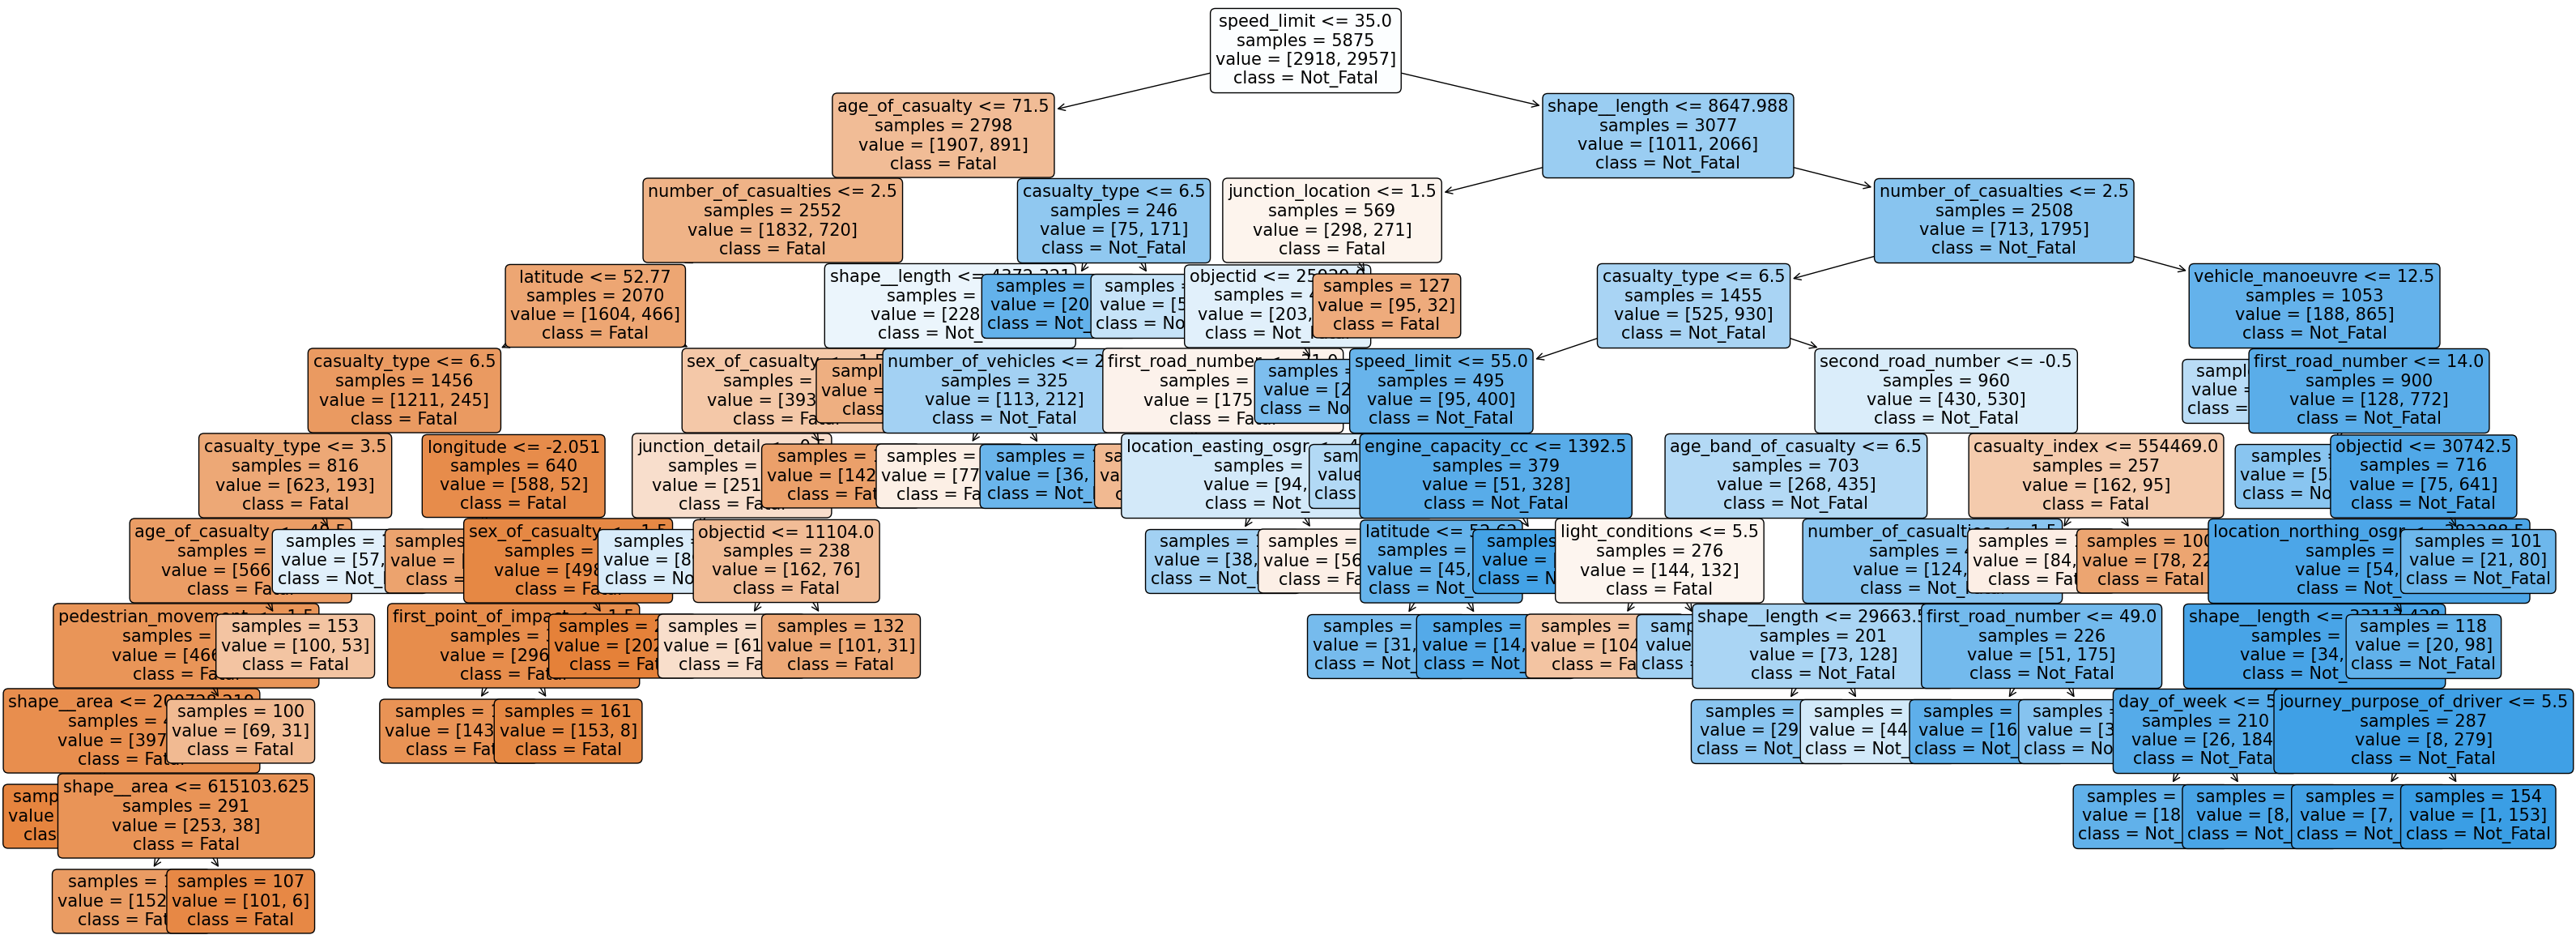

In [135]:
feature_importances = DecTree.feature_importances_# feature importances from the DecisionTreeClassifier

# Get the feature names (assuming they are stored in a list or array)
feature_names = DecTree.feature_names_in_

# Creation of a DataFrame to store feature names and their corresponding importances
relevance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Now, we sort  the DataFrame in descending order of feature importances
relevance_df = relevance_df.sort_values(by='Importance', ascending=False)

feature_names_list = list(feature_names)# Convert the feature_names array to a list

# Visualize the decision tree with arrows and suggestions
plt.figure(figsize=(40, 15))
plot_tree(DecTree, feature_names=feature_names_list, class_names=["Fatal", "Not_Fatal"],
          filled=True, rounded=True, impurity=False, fontsize=15)
plt.show() #display plot


## Using Random forest classification model

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [137]:
model_forest = RandomForestClassifier(
    n_estimators=100)

In [138]:
model_forest.fit(X_train, y_train)

RandomForestClassifier()

### Prediction using the random forest classifier model

In [139]:
y_output = model_forest.predict(X_test)

In [140]:
import sklearn.metrics

# Assuming y_output and y_test are your actual data
accuracy = sklearn.metrics.accuracy_score(y_output, y_test)


In [141]:
from sklearn.metrics import accuracy_score

# Assuming y_output and y_test are your actual data
accuracy = accuracy_score(y_output, y_test)


In [142]:
accuracy #Accuracy of the Random forest classifier model

0.8869979577944179

### Evaluation of the random forest classifier

<Axes: >

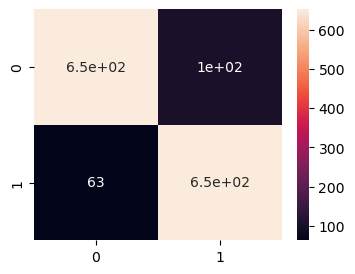

In [143]:
plt.figure(figsize= (4,3))
sns.heatmap(confusion_matrix(y_test,y_output), annot = True)

In [144]:
print(classification_report(y_test,y_output))

              precision    recall  f1-score   support

       False       0.91      0.86      0.89       754
        True       0.86      0.91      0.89       715

    accuracy                           0.89      1469
   macro avg       0.89      0.89      0.89      1469
weighted avg       0.89      0.89      0.89      1469



## Using bagging cassifier model

In [145]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier()

In [146]:
bagging_model = BaggingClassifier()

In [147]:
bagging_model.fit(X_train, y_train)

BaggingClassifier()

### Prediction using the bagging classifier model

In [148]:
y_valid = bagging_model.predict(X_test)

In [149]:
from sklearn.metrics import accuracy_score

# Assuming y_output and y_test are your actual data
accuracy = accuracy_score(y_valid, y_test)


In [150]:
accuracy #Accuracy of the bagging classifier model

0.852280462899932

### Evaluation of the bagging classifier model

<Axes: >

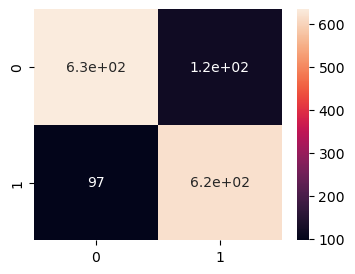

In [151]:
plt.figure(figsize= (4,3))
sns.heatmap(confusion_matrix(y_test,y_valid), annot = True)

In [152]:
print(classification_report(y_test,y_valid))

              precision    recall  f1-score   support

       False       0.87      0.84      0.85       754
        True       0.84      0.86      0.85       715

    accuracy                           0.85      1469
   macro avg       0.85      0.85      0.85      1469
weighted avg       0.85      0.85      0.85      1469

